### Techniques they can use to form a variable into Normal distribution 
- Logarithmic Transformation - np.log(X)
- Reciprocal transformation - 1 / x
- Square root transformation - X ** (1/2)
- Exponential transformation - e**x
- Box cox transformation
- Yeo-johnson transformation

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv("house_price.csv")

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
import sklearn 

In [6]:
import scipy.stats as stats  # used for Q-Q plot 

### Original Distribution 

In [17]:
def fun(df,var):
    plt.figure(figsize = (15,7))
    plt.subplot(1,2,1)
    df[var].hist(bins = 30)
    
    plt.subplot(1,2,2)
    stats.probplot(df[var],dist='norm',plot = plt)
    plt.show()
    

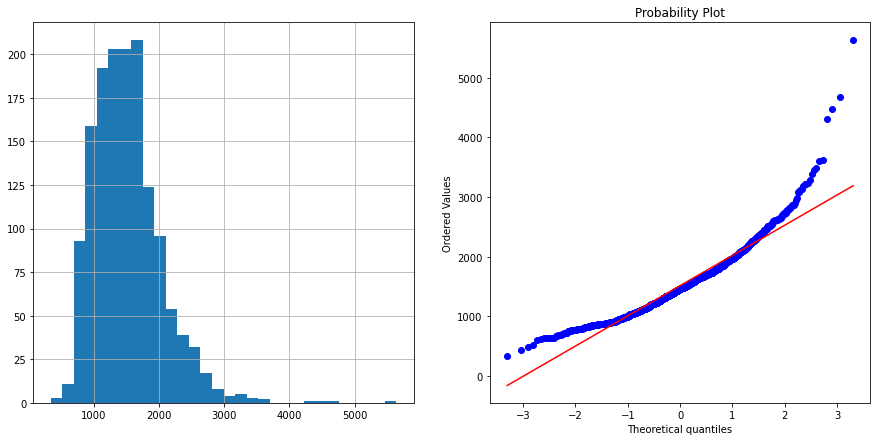

In [18]:
fun(df,'GrLivArea')

### Logarthimic transformation 

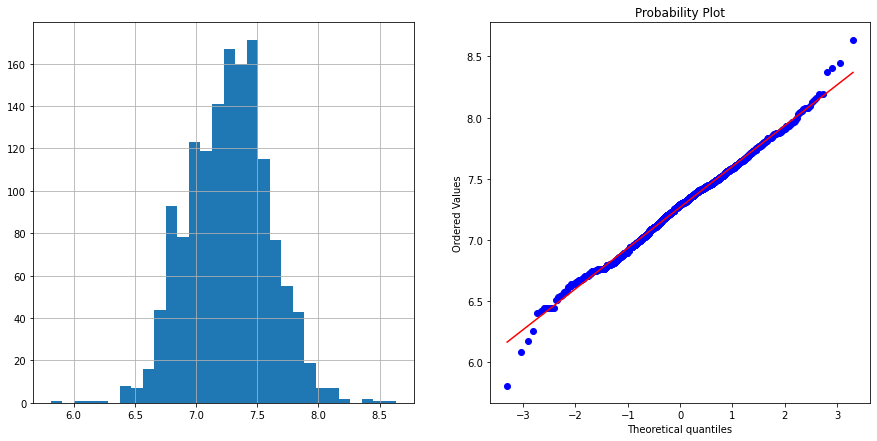

In [19]:
df['GrLivArea_log'] = np.log(df['GrLivArea'])  # log(x)
fun(df,'GrLivArea_log')

### Reciprocal Transformation 

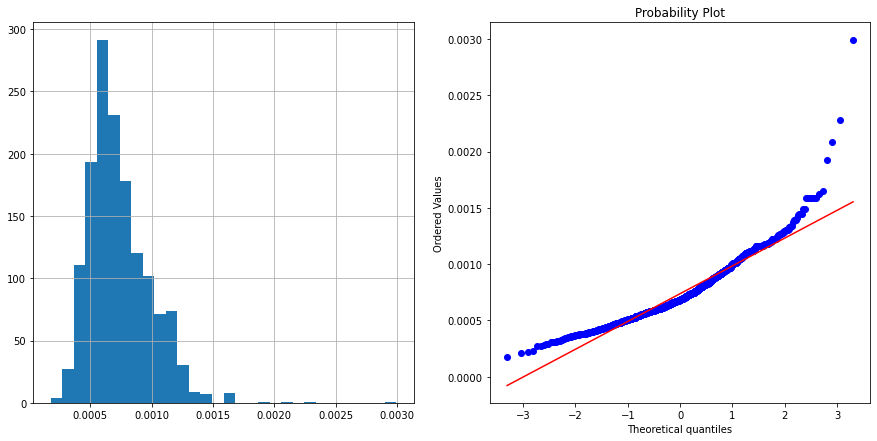

In [20]:
df['GrLivArea_rec'] = 1 / df['GrLivArea']
fun(df,'GrLivArea_rec')

In [22]:
3 ** (1/1.5)

2.080083823051904

In [23]:
1/1.5

0.6666666666666666

In [24]:
3 ** 0.6666666666666666

2.080083823051904

In [ ]:
2 ** (1/1.5)

In [26]:
4 ** (1/2)

2.0

### Square Root Techniques

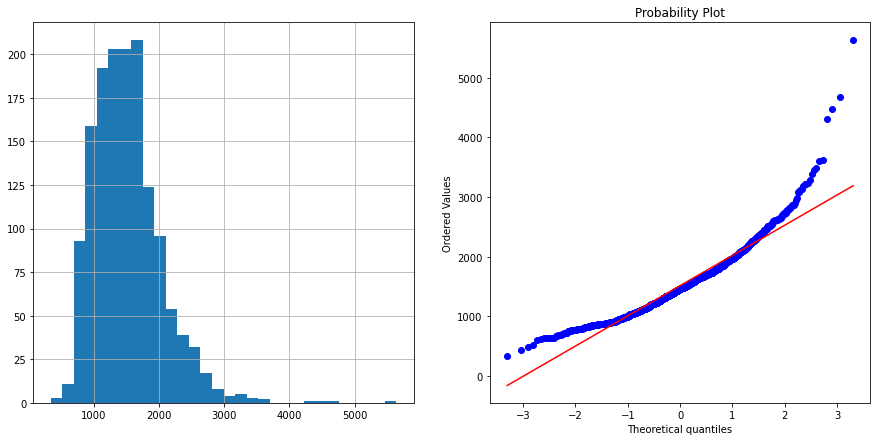

In [27]:
df['GrLivArea_squ'] = np.sqrt(df['GrLivArea'])
fun(df,'GrLivArea')

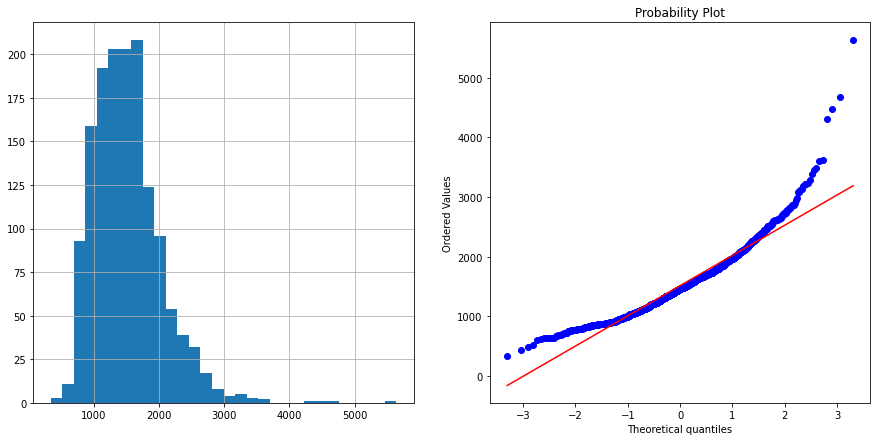

In [28]:
# same but with maths 

df['GrLivArea_squ_m'] = df['GrLivArea'] ** (1/2)
fun(df,'GrLivArea')

### Exponential Transformation 

In [29]:
np.exp(4)

54.598150033144236

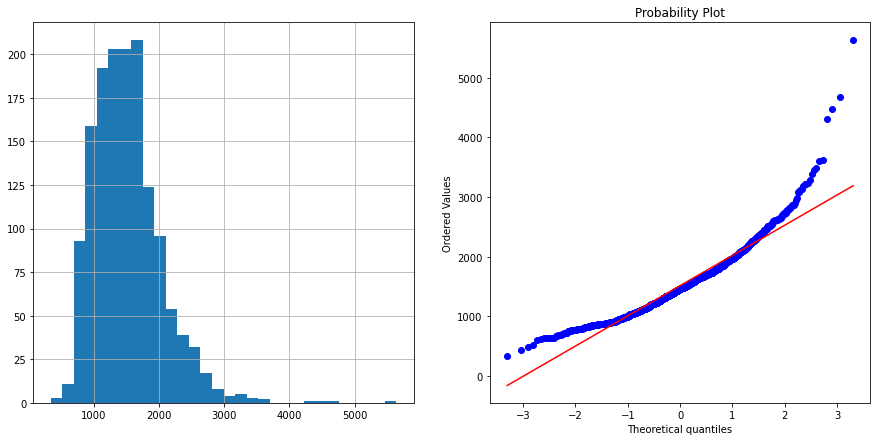

In [30]:
df['GrLivArea_exp'] = df['GrLivArea'] ** (1/1.5)
fun(df,'GrLivArea')

### Box_cox transformation

ALpha value : 0.006304924353543215


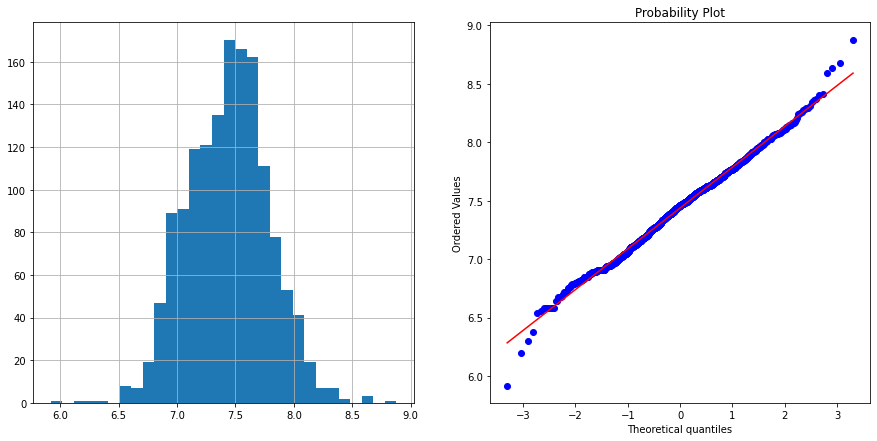

In [31]:
df['GrLivArea_box'] , aph = stats.boxcox(df['GrLivArea'])
print("ALpha value :",aph)
fun(df,'GrLivArea_box')

### Yeojohnson transformation 

Alpha value =  0.005539641278705955


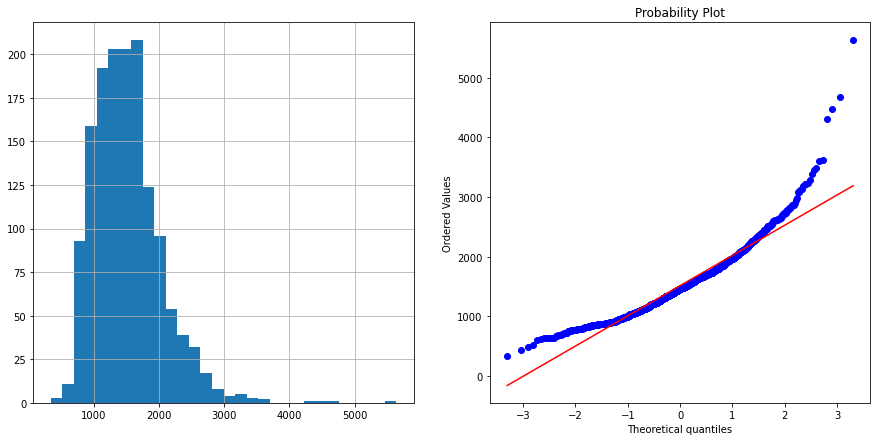

In [32]:
df['GrLivArea_john'] , alp = stats.yeojohnson(df['GrLivArea'])
print("Alpha value = ",alp)
fun(df,'GrLivArea')

### Using Feature-engine 

In [33]:
import feature_engine.transformation as vt

### Logarthmic  using Feature engine 

In [ ]:
def fun(data,var):
    plt.figure(figsize = (15,7))
    plt.subplot(1,2,1)
    data[var].hist(bins = 30)
    
    plt.subplot(1,2,2)
    stats.probplot(data[var],dist='norm',plot = plt)
    plt.show()
    

In [34]:
reg = vt.LogTransformer(variables=['GrLivArea'])

In [35]:
data = df.copy()

In [37]:
reg.fit(data)

LogTransformer(variables=['GrLivArea'])

In [38]:
data_1 = reg.transform(data)

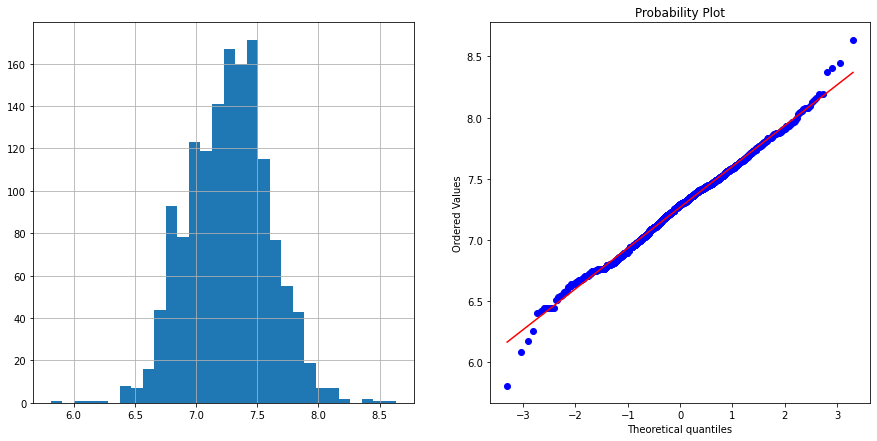

In [39]:
fun(data_1 , 'GrLivArea')

### Recipocal 

In [40]:
reg = vt.ReciprocalTransformer(variables=['GrLivArea'])

In [41]:
reg.fit(data)

ReciprocalTransformer(variables=['GrLivArea'])

In [42]:
data_1 = reg.transform(data)

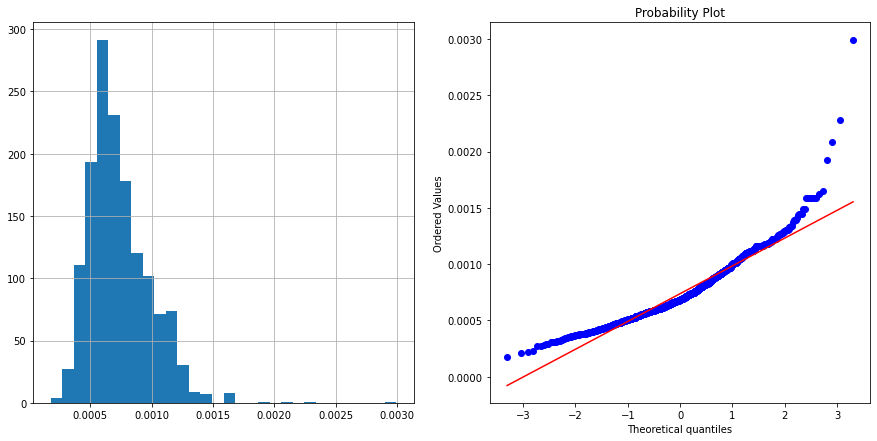

In [43]:
fun(data_1,'GrLivArea')

### Exponential root 

In [45]:
reg = vt.PowerTransformer(variables=['GrLivArea'])

In [46]:
reg.fit(data)

PowerTransformer(variables=['GrLivArea'])

In [47]:
data_1 = reg.transform(data)

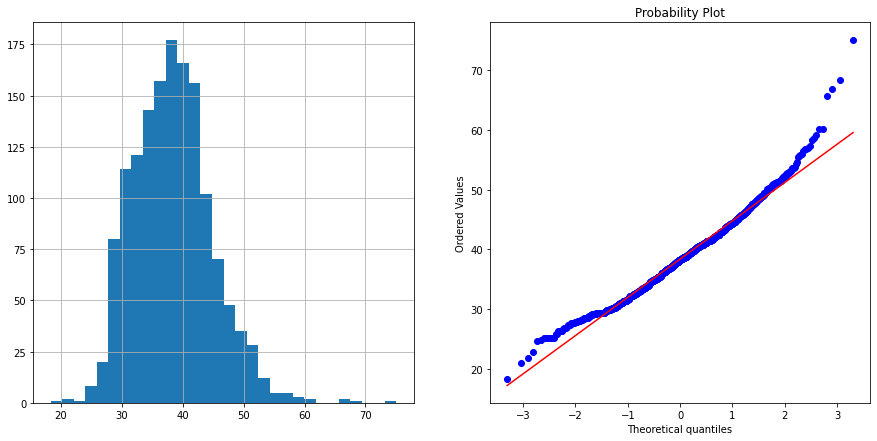

In [48]:
fun(data_1,'GrLivArea')

### Boxcox

In [49]:
reg = vt.BoxCoxTransformer(variables=['GrLivArea'])

In [50]:
reg.fit(data)

BoxCoxTransformer(variables=['GrLivArea'])

In [51]:
reg.lambda_dict_

{'GrLivArea': 0.006304924353543215}

In [52]:
data_1 = reg.transform(data)

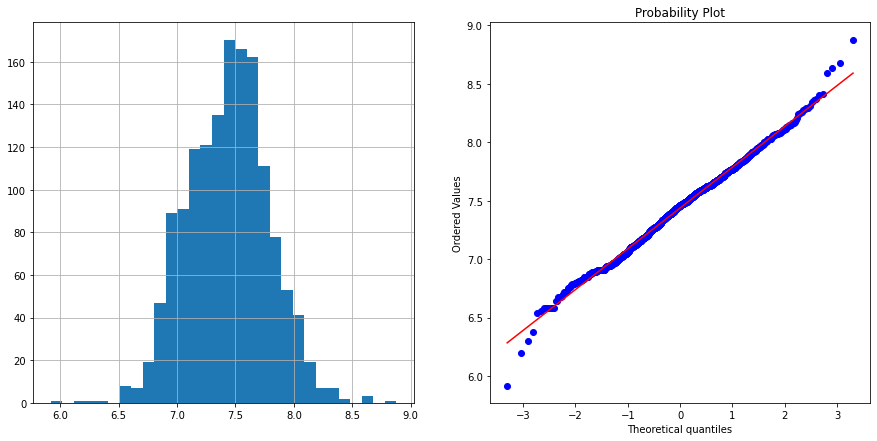

In [53]:
fun(data_1 , 'GrLivArea')

### Yejohnson transformation 

In [54]:
reg = vt.YeoJohnsonTransformer(variables=['GrLivArea'])

In [55]:
reg.fit(data)

YeoJohnsonTransformer(variables=['GrLivArea'])

In [56]:
reg.get_params

<bound method BaseEstimator.get_params of YeoJohnsonTransformer(variables=['GrLivArea'])>

In [57]:
reg.lambda_dict_

{'GrLivArea': 0.005539641278705955}

In [58]:
data_1 = reg.transform(data)

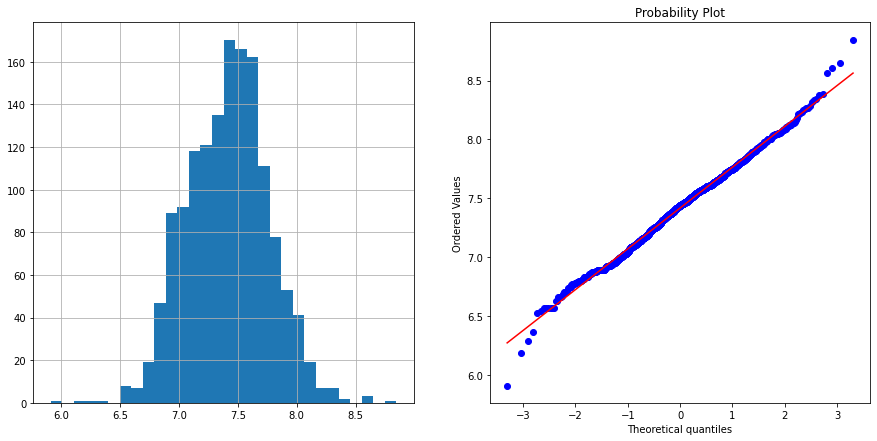

In [59]:
fun(data_1,'GrLivArea')